# Model Anaylsis KNN Classifier #

In [2]:
import numpy as np
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Training and Testing datasets ##

In [3]:
#Provide Training dataset path
dataset_path_training = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/combined_dataset_training.pkl" 
dataset, labels = joblib.load(dataset_path_training)

In [4]:
#Provide Testing dataset path
dataset_path_testing = "/Users/rakesh/Desktop/BTech_2/IML_lab/RPS/RPS_final/RPS_cobmined_V12/combined_dataset_testing.pkl" 
dataset_test, labels_test = joblib.load(dataset_path_testing)

## Model Training ##

In [19]:
X = np.array(dataset)
y = np.array(labels)

X_train_flat = X.reshape(X.shape[0], -1)

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_flat, y)

model_name = "KNN_model_8486.pkl"  
joblib.dump(clf, model_name)
print(f"Model saved as {model_name}")

Model saved as KNN_model_8486.pkl


# Model Evaluation #

## Confusion Matrix ##

In [20]:
predictions=[]

for points in dataset_test:
    X_cls = np.array(points).reshape(1, -1)

    # Make predictions
    pred_class = clf.predict(X_cls)
    predictions.append(pred_class[0])

predictions_array=np.array(predictions)
print(predictions_array[:5])

['paper' 'rock' 'paper' 'scissors' 'paper']


In [21]:
labels_array=np.array(labels_test)
print(labels_array[:5])

['paper' 'rock' 'paper' 'scissors' 'paper']


In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_test=labels_array
y_pred=predictions_array

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)

Confusion Matrix:
[[317  63  13]
 [  3 359  28]
 [  0  72 328]]

Classification Report:
              precision    recall  f1-score   support

       paper       0.99      0.81      0.89       393
        rock       0.73      0.92      0.81       390
    scissors       0.89      0.82      0.85       400

    accuracy                           0.85      1183
   macro avg       0.87      0.85      0.85      1183
weighted avg       0.87      0.85      0.85      1183


Accuracy: 0.8486897717666948


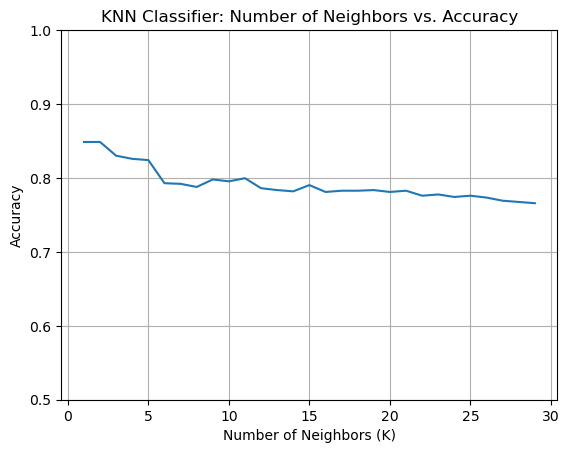

Highest Accuracy by KNN: [1, 0.8486897717666948]


In [12]:
import matplotlib.pyplot as plt

X = np.array(dataset)
y = np.array(labels)

n_neighbors_list = []
acc_knn = []

highest_acc_knn = [0, 0]

for n_neighbors in range(1, 30):
    X_train_flat = X.reshape(X.shape[0], -1)
    X_test_flat = dataset_test.reshape(dataset_test.shape[0], -1)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_flat, y)
    y_pred_knn = knn.predict(X_test_flat)
    accuracy_knn = accuracy_score(labels_test, y_pred_knn)

    if accuracy_knn > highest_acc_knn[1]:
        highest_acc_knn[1] = accuracy_knn
        highest_acc_knn[0] = n_neighbors
    
    n_neighbors_list.append(n_neighbors)
    acc_knn.append(accuracy_knn)

plt.plot(n_neighbors_list, acc_knn)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier: Number of Neighbors vs. Accuracy')
plt.grid(True)
plt.ylim(0.5, 1.0)
plt.show()

print("Highest Accuracy by KNN:", highest_acc_knn)